# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [14]:
df = pd.read_csv('/Users/aditikashi/Downloads/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [15]:
df.rename({'AVG_MATH_8_SCORE': 'avg_math8'},axis = 1, inplace = True)
df.dropna(subset=['avg_math8'], inplace=True)
df.dropna(subset=['YEAR'], inplace=True)

#displaying columns
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'avg_math8',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 8 Math

How many years of data are logged in our dataset? 

In [16]:
print(df["YEAR"].nunique())

13


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [17]:
#calculating the averages for Michigan and Ohio
michigan_score = df.groupby('STATE')["avg_math8"].mean()['MICHIGAN']
ohio_score = df.groupby('STATE')["avg_math8"].mean()['OHIO']

#printing the average Michigan and Ohio scores
print(f"Michigan score across all years: {michigan_score}")
print(f"Ohio score across all years: {ohio_score}")

#to determine which state has a higher score
if michigan_score > ohio_score:
    print(f"Michigan has a higher average score")
else:
    print(f"Ohio has a higher average score")


Michigan score across all years: 276.1666666666667
Ohio score across all years: 282.25
Ohio has a higher average score


Find the average for your outcome score across all states in 2019

In [18]:
df.groupby('YEAR')["avg_math8"].mean()[2019]

281.2641509433962

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [19]:
print(df.groupby('STATE')["avg_math8"].max())

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [20]:
#Graph 1
df['INSTRUCTION_EXPENDITURE_OVER_TOTAL_EXPENDITURE'] = (df['INSTRUCTION_EXPENDITURE'] / df['TOTAL_EXPENDITURE'])*100



Feature engineering justification:

- I wanted to test the correlation between average math 8 scores and the percent of instruction expenditure of the total expenditure. I would expect the average scores to increase along with an increase of percent of instruction expenditure.


<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, 'Average Math 8 Scores vs. Percentage of Instruction Expenditure')

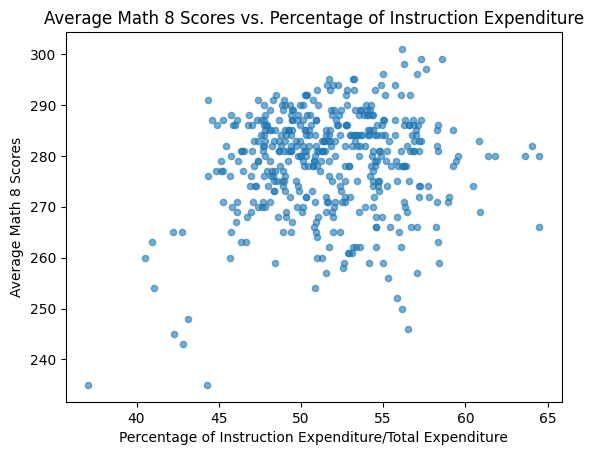

In [21]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_OVER_TOTAL_EXPENDITURE', y='avg_math8', alpha=0.6)
plt.xlabel('Percentage of Instruction Expenditure/Total Expenditure')
plt.ylabel('Average Math 8 Scores')
plt.title('Average Math 8 Scores vs. Percentage of Instruction Expenditure')

This scatterplott graphs the relationship between the percentage of instruction expenditure and the average math 8 scores for each state. As seen in the graph, there is no correlation between the percentage of instructional expenditure and the average math 8 scores. 

**Visualization 2**

Text(0.5, 1.0, '8th Grade Math and 4th Grade Math Score Over Time')

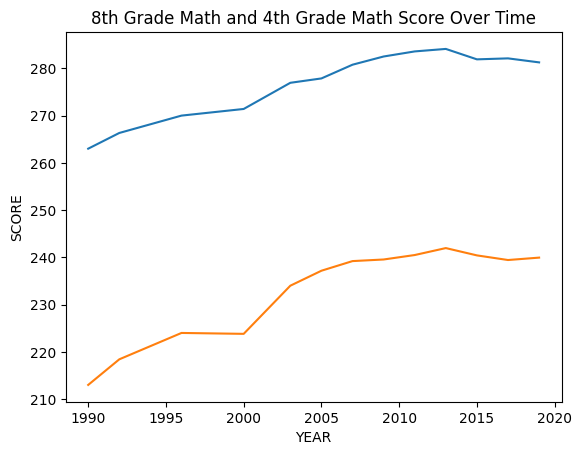

In [22]:
df.groupby('YEAR')["avg_math8"].mean().plot()
df.groupby('YEAR')["AVG_MATH_4_SCORE"].mean().plot()

plt.ylabel('SCORE')
plt.title('8th Grade Math and 4th Grade Math Score Over Time')

This graph shows the average scores of 8th grade math and 4th grade math on the same plot. I initially graphed this to observe the overall trend of each line. Because both lines have very similar trends in the same years, it suggests that all math scores of all grades fluctuate similarily in the same year.  

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df[['INSTRUCTION_EXPENDITURE_OVER_TOTAL_EXPENDITURE','AVG_MATH_4_SCORE']].dropna()
y = df.loc[X.index]['avg_math8']

#filling in all the N/A values
y.fillna(y.median(), inplace=True)

In [25]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [26]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [27]:
# create your model here
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [30]:
print(f"R^2 value: {model.score(X_test, y_test)}")

R^2 value: 0.8708595141904079


In [31]:
X_train

,INSTRUCTION_EXPENDITURE_OVER_TOTAL_EXPENDITURE,AVG_MATH_4_SCORE
802,53.223211,236.0
705,58.295476,232.0
900,53.426847,244.0
1121,50.545128,247.0
585,53.107348,223.0
...,...,...
1006,51.620424,237.0
773,43.138046,214.0
596,47.754235,238.0
416,37.058384,192.0


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

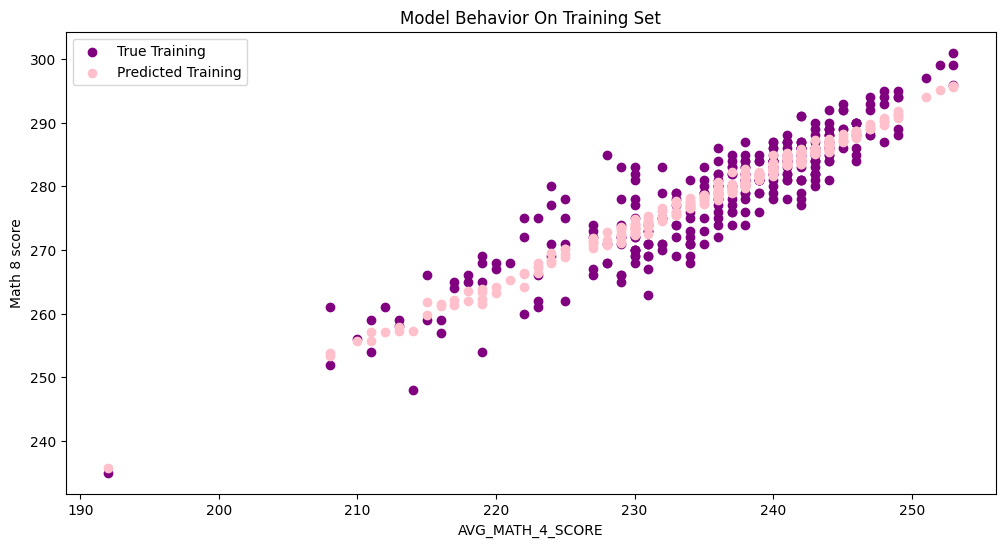

In [38]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "purple")
plt.scatter(X_train[col_name], model.predict(X_train), color = "pink")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

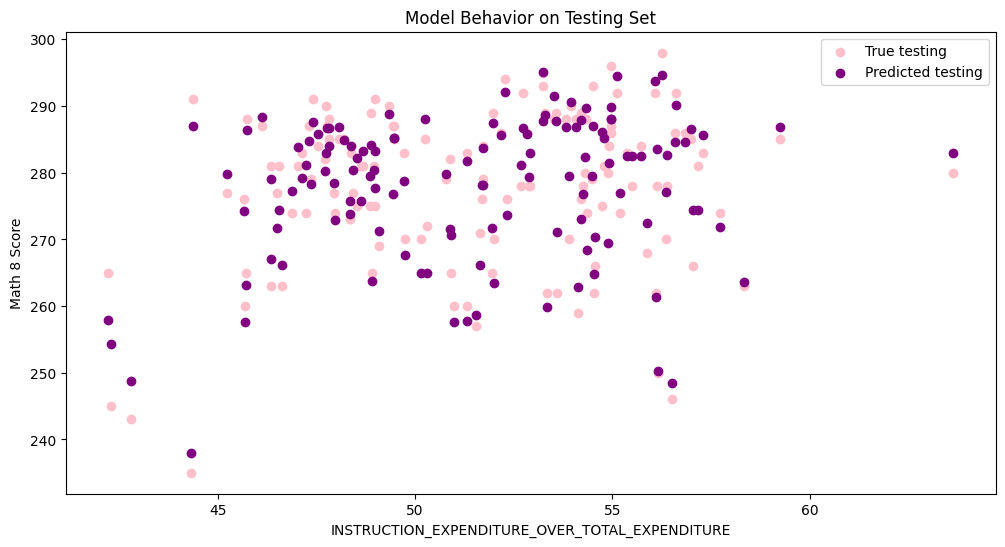

In [39]:
col_name = 'INSTRUCTION_EXPENDITURE_OVER_TOTAL_EXPENDITURE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "pink")
plt.scatter(X_test[col_name], model.predict(X_test), color = "purple")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<**In my initial analysis during checkpoint 1, I examined the correlation between average math 8 scores, average math 4 scores, and the percentage of instruction expenditure within the total expenditure. I had initially anticipated a strong positive correlation between both factors and the average math 8 scores.**

**Upon visualizing the data, I observed a robust correlation between average math 4 scores and average math 8 scores. However, my initial expectation of a strong correlation between the percentage of instruction expenditure and average math 8 scores was proven incorrect.**

**While the models generally align with the existing data trends, particularly the model for instruction expenditure exhibiting a similar scattering pattern, there are areas for improvement. The first model, despite having an overall R^2 value of 0.8709 and following a comparable trend, still displays inaccuracies. Notably, in model 1, the predicted values are excessively close together compared to the true values, indicating room for refinement.**\>